<a href="https://colab.research.google.com/github/AngeloImon/Aulas-IA/blob/main/Trabalho_IA_Classificador_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de
### Angelo Ferdinand Imon Spano
### Mariana Nakamura Taba
### Joao Vitor Bravo Arruda

In [1]:
import pandas as pd               # Manipulação de dados em DataFrames
import numpy as np                # Operações numéricas e arrays
import matplotlib.pyplot as plt   # Criação de gráficos
import seaborn as sns             # Visualizações estatísticas

# Configuração do estilo do gráfico para fundo com grade branca
sns.set_style('whitegrid')

In [2]:
# Import do Titanic DataSet via Seaborn
titanic = sns.load_dataset('titanic')

# Exibir as 5 primeiras linhas do DataFrame - Teste e Verificação
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:
# Exibir resumo da estrutura do DataFrame
# Mostrar número de entradas, tipos de dados e valores não nulos
titanic.info()

# Calcular e exibir estatísticas descritivas
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Verifica e conta os valores nulos em cada coluna
print("Valores faltantes por coluna:")
print(titanic.isnull().sum())

Valores faltantes por coluna:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


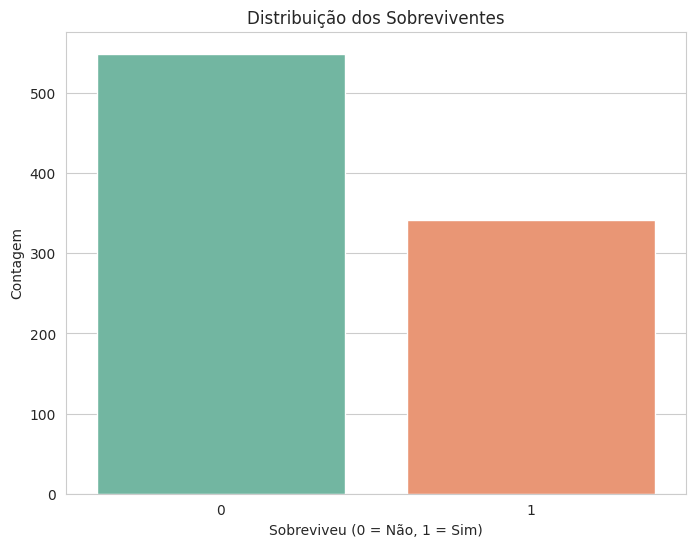

In [5]:
# Configuração do gráfico
plt.figure(figsize=(8, 6))  # Define o tamanho da figura (Largura x Altura)
sns.countplot(x='survived', data=titanic, hue='survived', palette='Set2', dodge=False, legend=False)
# Conta e plota a coluna 'survived', com 'hue' para compatibilidade futura

# Configuração dos títulos e eixos
plt.title('Distribuição dos Sobreviventes')  # Título do gráfico
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')  # Título do eixo X
plt.ylabel('Contagem')  # Título do eixo Y

# Exibição do gráfico
plt.show()

In [6]:
titanic.value_counts("survived")

,count
survived,
0,549
1,342


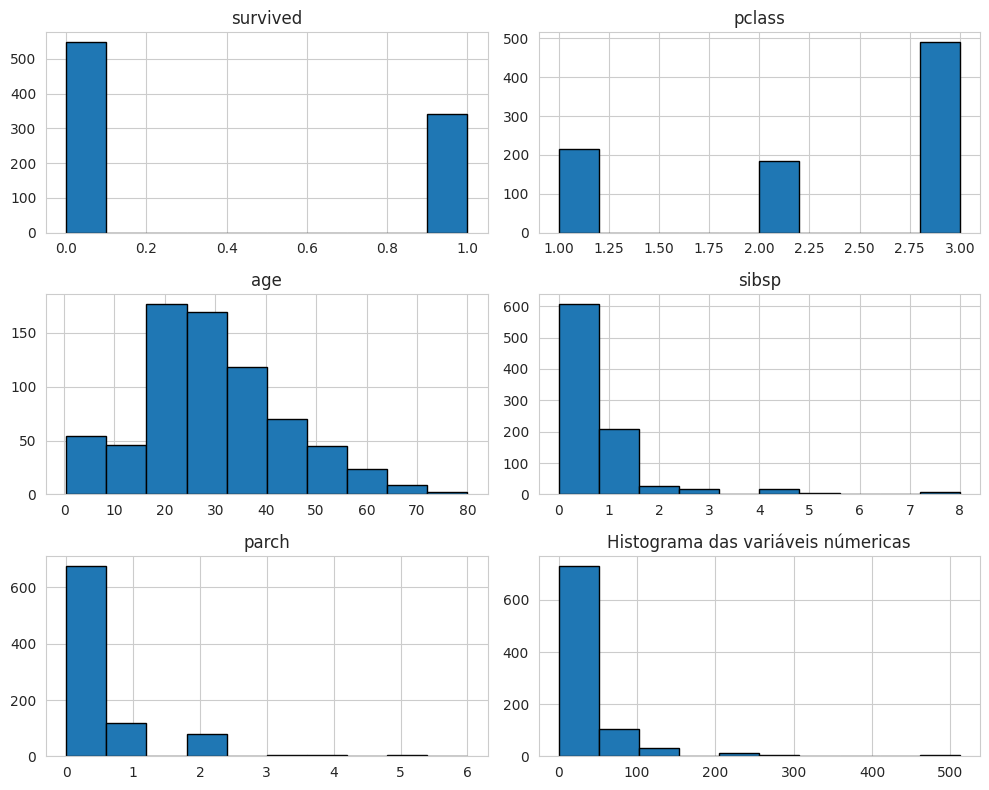

In [7]:
# Histograma: distribuíção dos dados para cada variável númerica
titanic.hist(edgecolor = 'black', figsize=(10, 8))
plt.title('Histograma das variáveis númericas')
plt.tight_layout()
plt.show()

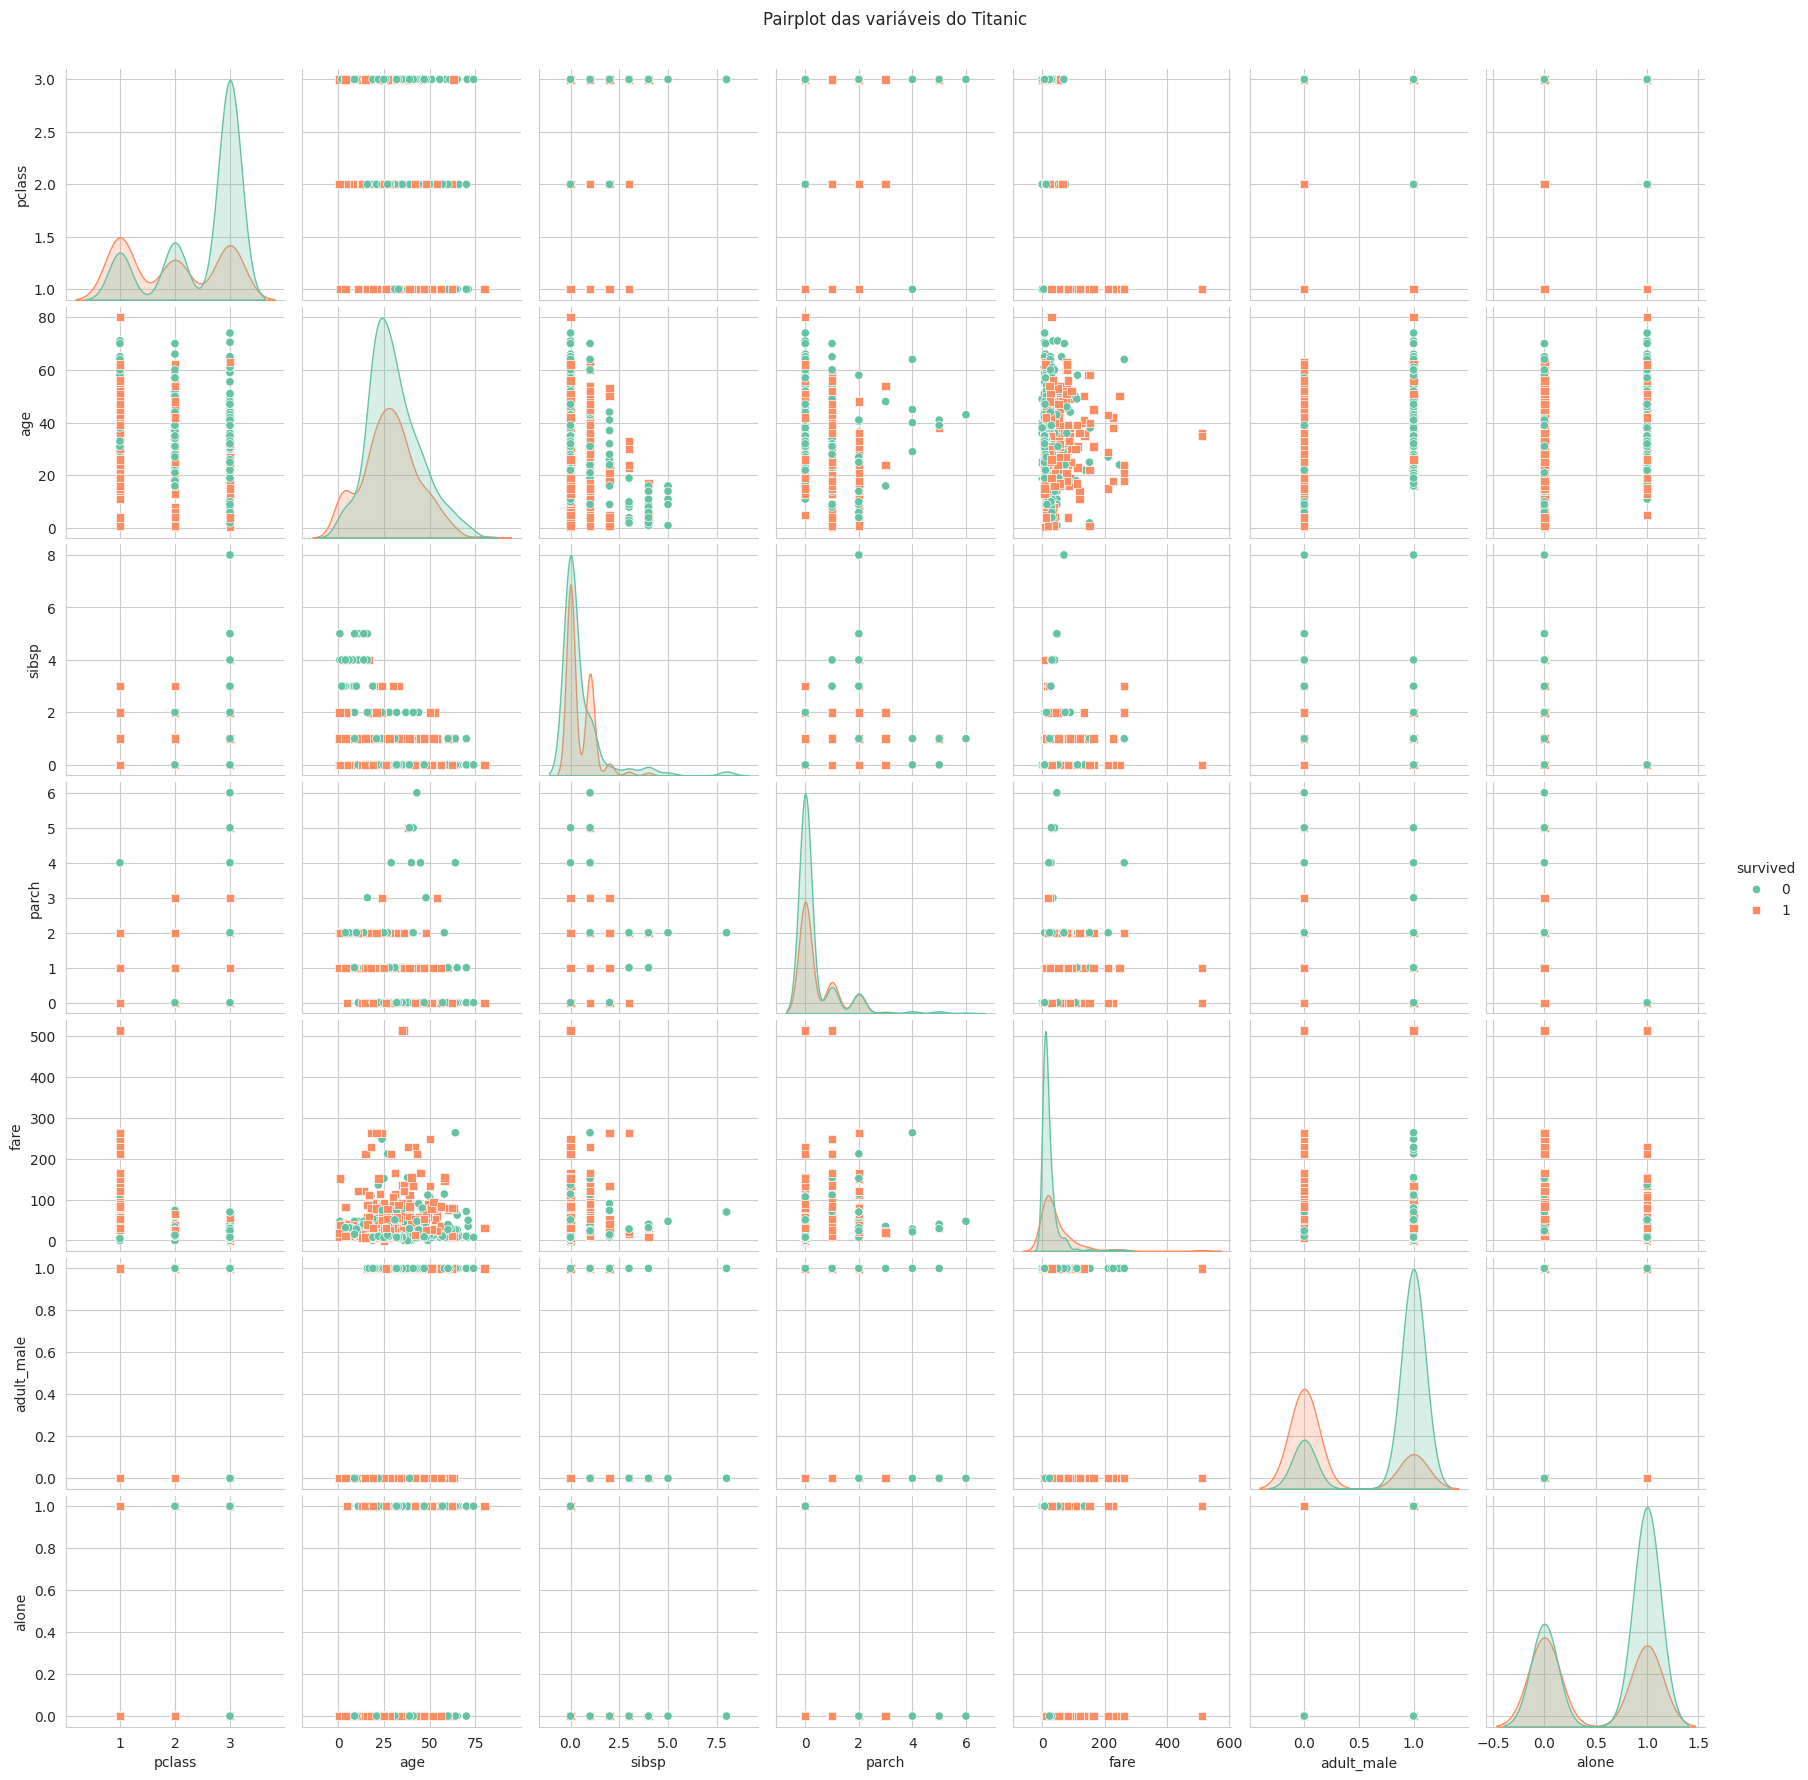

In [8]:
# Conjunto de gráficos para visualizar as relações entre todas as combinações de variáveis
sns.pairplot(titanic, hue='survived', markers=['o', 's'], palette='Set2')   # O 'hue' é baseado na coluna 'survived'
plt.suptitle('Pairplot das variáveis do Titanic', y=1.02)                   # Atualização do título
plt.show()

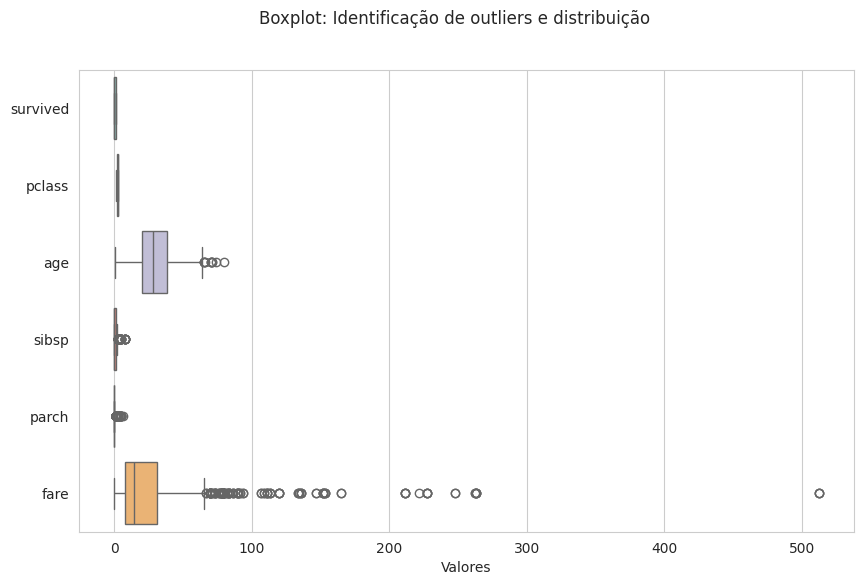

In [9]:
# Resumo da distribuição dos dados, com mediana, quartis e outliers
plt.figure(figsize=(10, 6))  # Cria nova figura com tamanho específico
sns.boxplot(data=titanic.select_dtypes(include=['float', 'int']), orient='h', palette='Set3')

# Plota boxplot horizontal para variáveis numéricas
plt.suptitle('Boxplot: Identificação de outliers e distribuição')   # Título
plt.xlabel('Valores')                                               # Define título do eixo X
plt.show()

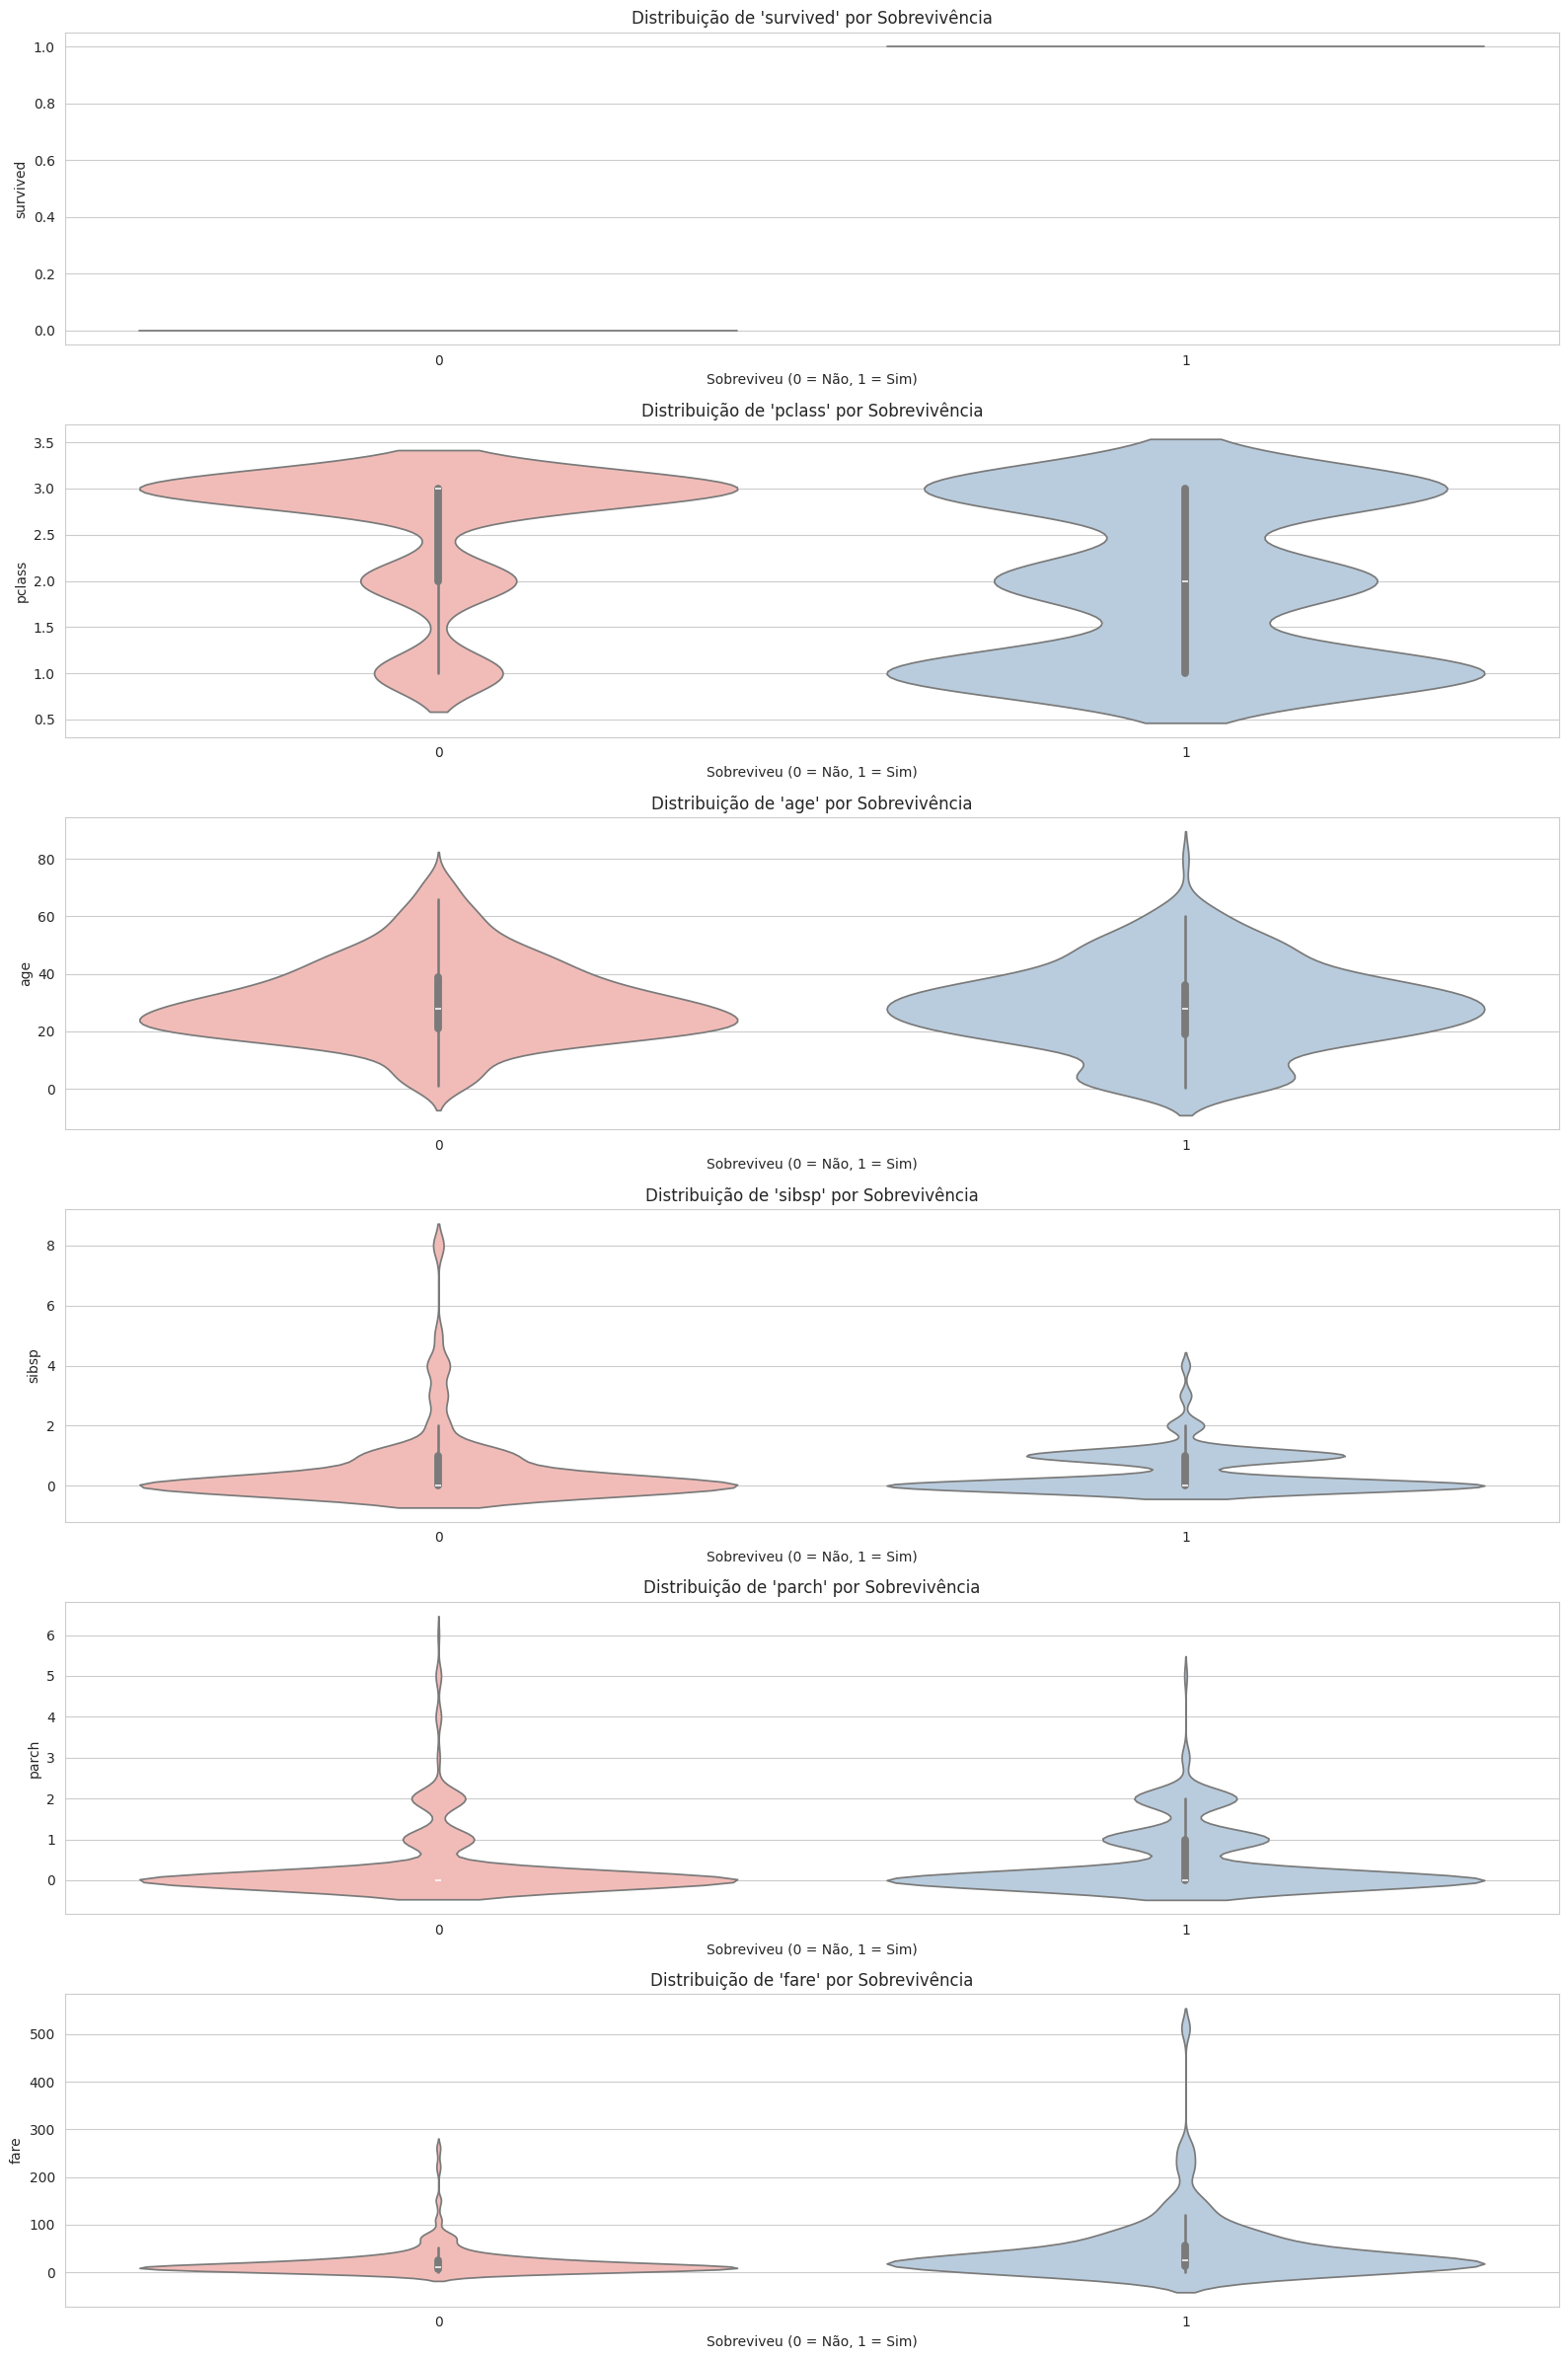

In [10]:
# Filtrar apenas variáveis numéricas
numerical_columns = titanic.select_dtypes(include=['float', 'int']).columns

# Criar gráficos violino para cada variável numérica
plt.figure(figsize=(16, len(numerical_columns) * 4))    # Ajusta o tamanho da figura com base no número de variáveis
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)       # Configura subplots
    sns.violinplot(data=titanic, x='survived', y=col, hue='survived', palette='Pastel1', dodge=False, legend=False)
    plt.title(f"Distribuição de '{col}' por Sobrevivência")
    plt.xlabel("Sobreviveu (0 = Não, 1 = Sim)")
    plt.ylabel(col)

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

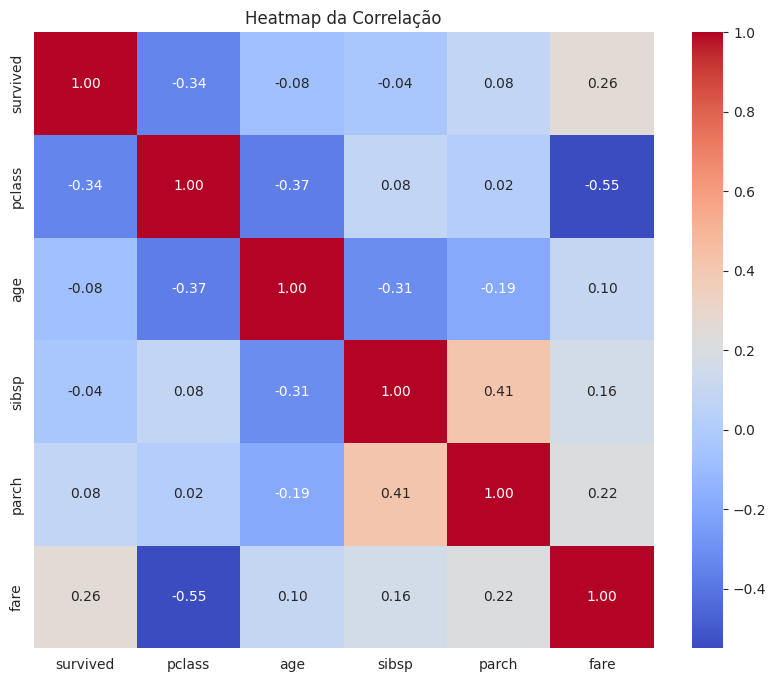

In [11]:
# Calcula a matriz de correlação das variáveis numéricas
correlation_matrix = titanic.select_dtypes(include=['float', 'int']).corr()

# Cria um mapa de calor (heatmap) para visualizar a correlação entre as variáveis
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# Annot=True adiciona os valores numéricos dentro de cada célula
# Cmap='coolwarm' define a paleta de cores para representar as correlações positivas e negativas
# fmt=".2f" formata os numéricos para duas casas decimais

plt.title('Heatmap da Correlação')
plt.show()

In [12]:
# Importar as bibliotecas para o modelo de predição
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [13]:
# Convertendo a variável 'sex' de categórica para numérica
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

# Convertendo 'embarked' para numérico (Usando a codificação de mapa para 'C', 'Q', 'S')
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Seleção das variáveis independentes (features)
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]  # Incluir 'embarked'

# Variável dependente (target) - Sobreviveu ou não
y = titanic['survived']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [14]:
# Treinando o modelo - HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)


HistGradientBoostingClassifier()

In [15]:
# Fazendo previsões
y_pred = model.predict(X_test)

In [16]:
# Avaliando o modelo
print("Acurácia do modelo:", accuracy_score(y_test, y_pred))


Acurácia do modelo: 0.8666666666666667


In [17]:
# Gerar matriz confusão
from sklearn.metrics import confusion_matrix
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))


Matriz de Confusão:
 [[47  7]
 [ 5 31]]


In [18]:
# Exibir relatório de classificação detalhado, com precisão, recall, f1-score e cada classe
from sklearn.metrics import classification_report
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89        54
           1       0.82      0.86      0.84        36

    accuracy                           0.87        90
   macro avg       0.86      0.87      0.86        90
weighted avg       0.87      0.87      0.87        90



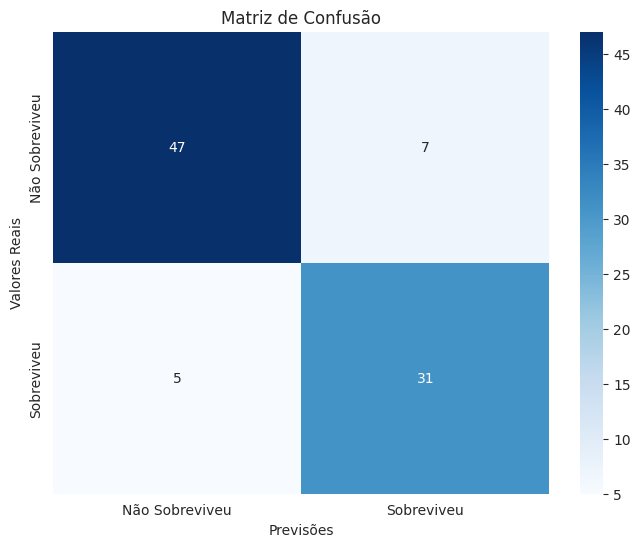

In [19]:
# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Sobreviveu", "Sobreviveu"], yticklabels=["Não Sobreviveu", "Sobreviveu"])
plt.title("Matriz de Confusão")
plt.xlabel("Previsões")
plt.ylabel("Valores Reais")
plt.show()


In [20]:
# Função para gerar entradas aleatórias
def gerar_entrada_aleatoria():
    # 'pclass': Classe do ticket (1, 2 ou 3)
    pclass = np.random.choice([1, 2, 3])
    # 'sex': Gênero (0 = masculino, 1 = feminino)
    sex = np.random.choice([0, 1])
    # 'age': Idade (supondo faixa de 0 a 80 anos)
    age = np.random.uniform(0, 80)
    # 'sibsp': Número de irmãos/cônjuges a bordo (0 a 5)
    sibsp = np.random.randint(0, 6)
    # 'parch': Número de pais/filhos a bordo (0 a 5)
    parch = np.random.randint(0, 6)
    # 'fare': Tarifa paga (supondo faixa de 0 a 500)
    fare = np.random.uniform(0, 500)
    # 'embarked': Porto de embarque (0 = Cherbourg, 1 = Queenstown, 2 = Southampton)
    embarked = np.random.choice([0, 1, 2])
    return np.array([[pclass, sex, age, sibsp, parch, fare, embarked]])

# Gerar uma entrada aleatória
nova_entrada = gerar_entrada_aleatoria()

# Converter a entrada em um DataFrame
nova_entrada_df = pd.DataFrame(nova_entrada, columns=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'])

# Realizar a previsão
predicao = model.predict(nova_entrada_df)

# Mostrar detalhes formatados
print("Detalhes da nova entrada:")
print(f"Classe do ticket (pclass): {nova_entrada_df.loc[0, 'pclass']}")
print(f"Gênero (sex): {'Masculino' if nova_entrada_df.loc[0, 'sex'] == 0 else 'Feminino'}")
print(f"Idade (age): {nova_entrada_df.loc[0, 'age']:.2f} anos")
print(f"Irmãos/Cônjuges a bordo (sibsp): {nova_entrada_df.loc[0, 'sibsp']}")
print(f"Pais/Filhos a bordo (parch): {nova_entrada_df.loc[0, 'parch']}")
print(f"Tarifa paga (fare): {nova_entrada_df.loc[0, 'fare']:.2f}")
print(f"Porto de embarque (embarked): {'Cherbourg' if nova_entrada_df.loc[0, 'embarked'] == 0 else 'Queenstown' if nova_entrada_df.loc[0, 'embarked'] == 1 else 'Southampton'}")
print("\nClasse prevista (Sobrevivência):", "Sobreviveu" if predicao[0] == 1 else "Não Sobreviveu")


Detalhes da nova entrada:
Classe do ticket (pclass): 2.0
Gênero (sex): Masculino
Idade (age): 34.82 anos
Irmãos/Cônjuges a bordo (sibsp): 3.0
Pais/Filhos a bordo (parch): 5.0
Tarifa paga (fare): 347.44
Porto de embarque (embarked): Cherbourg

Classe prevista (Sobrevivência): Não Sobreviveu
